# CIVL 547 - Assignment 2
estuary classification <br>

## Question 1
calc the classification of the Fraser River with varying river flow rates

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import statistics as stat

In [2]:
H = 10 # m
B = 1000 #m
Socn = 35 #ppt
Sr = 0
g = 9.81 #m/s2
Ut = 1 #m/s
Qr = [10000,3000,1000,300,100] #m3/s

# assume:
Sr = 0
Tr = 5
Tocn = 10

In [3]:
#first lets calculate the densities of the water using the UNESCO formula
a0 = 999.842594
a1 = 6.793952 * 10**-2
a2 = -9.095290 * 10**-3
a3 = 1.001685 * 10**-4
a4 = -1.120083 * 10**-6
a5 = 6.536332 * 10**-9

rho_river = a0+(a1*Tr)+(a2*Tr**2)+(a3*Tr**3)+(a4*Tr**4)+(a5*Tr**5)

b0 = 0.824493
b1 = -4.0899*10**-3
b2 = 7.6438*10**-5
b3 = -8.2467*10**-7
b4 = 5.3875*10**-9
c0 = -5.72466*10**-3
c1 = 1.0227*10**-4
c2 = -1.6546*10**-6
d0 = 4.8314*10**-4

b = (b0+(b1*Tocn)+(b2*Tocn**2)+(b3*Tocn**3)+(b4*Tocn**4))
c = c0+(c1*Tocn)+(c2*Tocn**2)
rho_ocn = (a0+(a1*Tocn)+(a2*Tocn**2)+(a3*Tocn**3)+(a4*Tocn**4)+(a5*Tocn**5)) + b*Socn + c*Socn**(3/2) + d0*Socn**2

In [4]:
c = math.sqrt(g*((rho_ocn-rho_river)/rho_ocn)*H) #assume Sriver = 0 and that T is constant therefore density difference is proportional to salinit
Ft = Ut/c
Ft_mod_cases = math.sqrt(B/H)*(Ut/c)

Ur = 0
Fr_cases = []

for Q in Qr:
    Ur = Q/(B*H)
    Fr_cases.append(Ur/c)

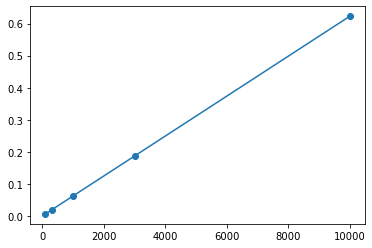

In [5]:
plt.scatter(Qr, Fr_cases)
plt.plot(Qr, Fr_cases)

In [6]:
#constant Ft_mod - therefore can find Fr transition points and backcalculate to get transition Qr
print('Constant moderated Ft =' + str(Ft_mod_cases))
full_partial = 2.2*10**-3 
partial_salt = 1.2*10**-1

Constant moderated Ft =6.228366027355241


In [7]:
Qr_full_partial = full_partial*B*H*c
print("The transition point from well-mixed to partially mixed is at a Fraser flow of "+str(round(Qr_full_partial,0))+" m3/s.")

Qr_partial_salt = partial_salt*B*H*c
print("The transition point from partially mixed to salt wedge is at a Fraser flow of "+str(round(Qr_partial_salt,0))+" m3/s.")

The transition point from well-mixed to partially mixed is at a Fraser flow of 35.0 m3/s.
The transition point from partially mixed to salt wedge is at a Fraser flow of 1927.0 m3/s.


In [8]:
print('river density =' +str(rho_river))
print('ocean density ='+str(rho_ocn))

river density =999.9667507866625
ocean density =1026.952411601175


## From Guha & Lawrence JPO 2013

In [9]:
#make mesh of Fr and Ft_mod
Fr = np.linspace(5*10**-4, 0.2, 1000)
Ft_mod = np.linspace(0, 30, 1000)
Fr, Ft_mod = np.meshgrid(Fr, Ft_mod)

In [10]:
#solve for x
c3 = 8.16*10**-5
x = np.empty([np.shape(Fr)[0],np.shape(Fr)[1]])

for i in range(len(x)):
    for j in range(len(x)):
        coeff = [1, 5.31*Fr[i,j]**(2/3), (6.04*Fr[i,j]**(4/3)) + c3*(Ft_mod[i,j]**2)*(Fr[i,j]**(-2/3)), -1]
        x[i,j] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]

<ipython-input-10-3ab4d56dd22b>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  x[i,j] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


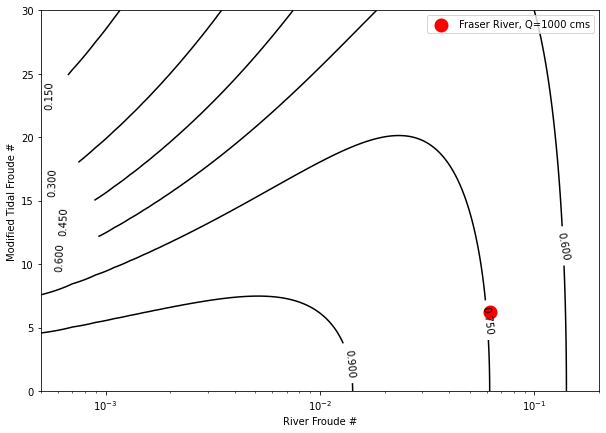

In [17]:
#NOTE this contour plot is for assignment 4 not assignment 2

plt.figure(figsize = (10,7))
#levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
CS = plt.contour(Fr,Ft_mod,x, colors='k')
plt.clabel(CS, fontsize=10)
plt.xscale('log')

plt.scatter(Fr_cases[2], Ft_mod_cases,c='r',label='Fraser River, Q=1000 cms', linewidths=8)
# for i, txt in enumerate(Qr):
#     plt.annotate(txt, (Fr_cases[i], Ft_mod_cases))
    
plt.xlabel('River Froude #')
plt.ylabel('Modified Tidal Froude #')
plt.legend(loc = 'upper right')

In [12]:
coeff2 = [1, 5.31*Fr_cases[2]**(2/3), (6.04*Fr_cases[2]**(4/3)) + c3*(Ft_mod_cases**2)*(Fr_cases[2]**(-2/3)), -1]
np.roots(coeff2)

array([-0.78923549+0.84909352j, -0.78923549-0.84909352j,
        0.7441293 +0.j        ])

In [13]:
#solve for phi
# phi = np.empty([np.shape(Fr)[0],np.shape(Fr)[1]])

# for i in range(len(x)):
#     for j in range(len(x)):
#         phi[i,j] = 7.06*(Fr[i,j]**2/3)*(x[i,j]**2) + 8.82*(Fr[i,j]**4/3)*x[i,j]

phi = 7.06*(Fr**(2/3))*(x**2) + 8.82*(Fr**(4/3))*x

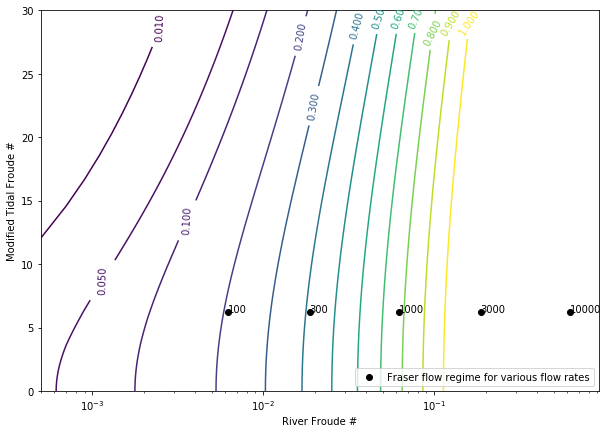

In [14]:
plt.figure(figsize = (10,7))
levels = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
CS = plt.contour(Fr,Ft_mod,phi,levels)
plt.clabel(CS, fontsize=10)
plt.xscale('log')

plt.scatter(Fr_cases, np.full((len(Fr_cases),), Ft_mod_cases),c='k',label='Fraser flow regime for various flow rates')
for i, txt in enumerate(Qr):
    plt.annotate(txt, (Fr_cases[i], Ft_mod_cases))
    
plt.xlabel('River Froude #')
plt.ylabel('Modified Tidal Froude #')
plt.legend(loc = 'lower right')

## Find the transition flow rate for the Fraser River

In [18]:
#first fully to partially mixed transition 
phi_search = 0.100
Fr_search = 0
n = 0

for i in range(len(phi)):
    for j in range(len(phi)):
        if abs(Ft_mod[i,j]-Ft_mod_cases)<(10**-1.6) and abs(phi[i,j]-phi_search)<(10**-2.65):
            Fr_search = Fr[i,j]

Qr_full_partial = Fr_search*B*H*c
print("The transition point from well-mixed to partially mixed is at a Fraser flow of "+str(round(Qr_full_partial,0))+" m3/s.")
print("/n Fr= "+str(Fr_search))

NameError: name 'phi' is not defined

In [16]:
#then partial to salt wedge transition
phi_search = 1
Fr_search = 0
n = 0

for i in range(len(phi)):
    for j in range(len(phi)):
        if abs(Ft_mod[i,j]-Ft_mod_cases)<(10**-1.7) and abs(phi[i,j]-phi_search)<(10**-3.8):
            Fr_search = Fr[i,j]

Qr_partial_salt = Fr_search*B*H*c
print("The transition point from partially mixed to a salt wedge is at a Fraser flow of "+str(round(Qr_partial_salt,0))+" m3/s.")
print("/n Fr= "+str(Fr_search))

The transition point from partially mixed to a salt wedge is at a Fraser flow of 1855.0 m3/s.
/n Fr= 0.11552702702702704


# Assignment 4

## Find and plot the salinity variation

In [9]:
#calculate sigma at the mouth
Fr = Fr_cases[2]
Ft = Ft_mod_cases
sigma_x = 0.7441293
c1 = 2.17
c2 = 1.34
c3 = 8.16*10**-5

a = c1*(Fr**(2/3))
b_c = (c2*(Fr**(4/3)))+(c3*(Ft**2)*(Fr**(-2/3)))

sigma = sigma_x**3+a*(sigma_x**2)+b_c*sigma_x
print(sigma)

0.6404564581694621


In [10]:
nondim_z = np.linspace(-1, 0, 250)
nondim_x = np.linspace(0,-1.5, 250)
#nondim_x, nondim_z = np.meshgrid(nondim_x, nondim_z)

In [11]:
#try to set up loop to solve for sigma at different points upstream of the mouth

sigma_step =  np.empty(np.shape(nondim_x))
sigma_step[0] = sigma
step = 1/(nondim_x[1]-nondim_x[0])
step2 = step**2
step3 = step**3

for i in range(len(sigma_step)-1):
    coeff = [step3, (-3*step3*sigma_step[i])+step2*a, (3*step3*(sigma_step[i]**2))-(2*a*step2*sigma_step[i])+(step*b_c), (-step3*(sigma_step[i]**3))+(step2*a*(sigma_step[i]**2))-(step*b_c*sigma_step[i])-sigma_step[i]]
    sigma_step[i+1] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]

<ipython-input-11-6456189439ef>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma_step[i+1] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


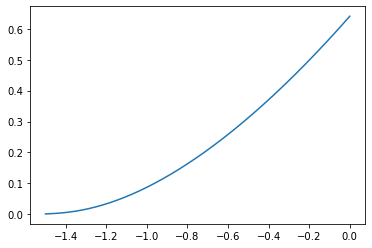

In [12]:
plt.plot(nondim_x, sigma_step)

In [13]:
#use forward finite difference method to calculate sigma_x
sigma_x = [(sigma_step[i+1]-sigma_step[i])/(nondim_x[i+1]-nondim_x[i]) for i in range(len(nondim_x)-1)]
sigma_x.append(0)

#### sticking in the answer to quesiton 5 here

In [14]:
R = sigma_step
E3 = [i**3 for i in sigma_x]
E2 = [a*i**2 for i in sigma_x]
E1 = [(c2*(Fr**(4/3)))*i for i in sigma_x]
T = [(c3*(Ft**2)*(Fr**(-2/3)))*i for i in sigma_x]

Text(0.5, 0, 'Non-dimensional distance into the estuary')

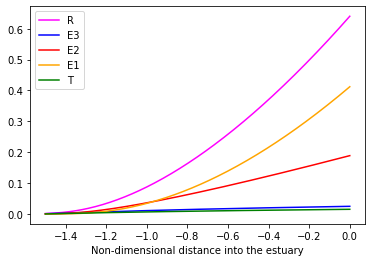

In [15]:
plt.plot(nondim_x, R, label='R',c='magenta')
plt.plot(nondim_x, E1, label='E3', c='b')
plt.plot(nondim_x, E2, label='E2', c='r')
plt.plot(nondim_x, E3, label='E1', c='orange')
plt.plot(nondim_x, T, label='T', c='green')
plt.legend()
plt.xlabel('Non-dimensional distance into the estuary')

In [16]:
#try normalizing by R
#R = R/R
E3 = E3/R
E2 = E2/R
E1 = E1/R
T = T/R

Text(0.5, 0, 'Non-dimensional distance into the estuary')

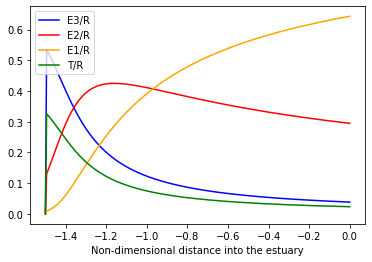

In [17]:
plt.plot(nondim_x, E1, label='E3/R',c='b')
plt.plot(nondim_x, E2, label='E2/R',c='r')
plt.plot(nondim_x, E3, label='E1/R',c='orange')
plt.plot(nondim_x, T, label='T/R', c='green')
plt.legend()
plt.xlabel('Non-dimensional distance into the estuary')

#### back to question 2/3!

In [18]:
#setup all the other terms you need to calculate U and salinity
P1 = (3/2)-(3/2)*(nondim_z**2)
P2 = 1-9*(nondim_z**2)-8*(nondim_z**3)
P3 = (-7/120)+(1/4)*(nondim_z**2)-(1/8)*(nondim_z**4)
P4 = (-1/12)+(1/2)*(nondim_z**2)-(3/4)*(nondim_z**4)-(2/5)*(nondim_z**5)

c4 = 0.667
c5 = 47
c6 = 70.5

In [19]:
#make the P values and sigma values into 2D meshes
blankY = np.linspace(1, 0, 250)
blankX = np.linspace(1, 0, 250) #these are just tools used to make the values we want into meshes using meshgrid
x=0
y=0

#want to vary horizontally
sigma_x, y = np.meshgrid(sigma_x, blankY)
sigma_step, y = np.meshgrid(sigma_step, blankY)

#want to vary vertically
x, P1 = np.meshgrid(blankX, P1)
x, P2 = np.meshgrid(blankX, P2)
x, P3 = np.meshgrid(blankX, P3)
x, P4 = np.meshgrid(blankX, P4)

In [20]:
#calculate non dimentional velocity and salinity
U = c4*(Fr**(1/3))*sigma_x*P2 + (Fr*P1)
S = sigma_step + c5*(Fr**(2/3))*(sigma_x**2)*P4 + c6*(Fr**(4/3))*sigma_x*P3

In [21]:
nondim_x, nondim_z = np.meshgrid(nondim_x, nondim_z)

Text(0.5, 0, 'Non-dimensional x')

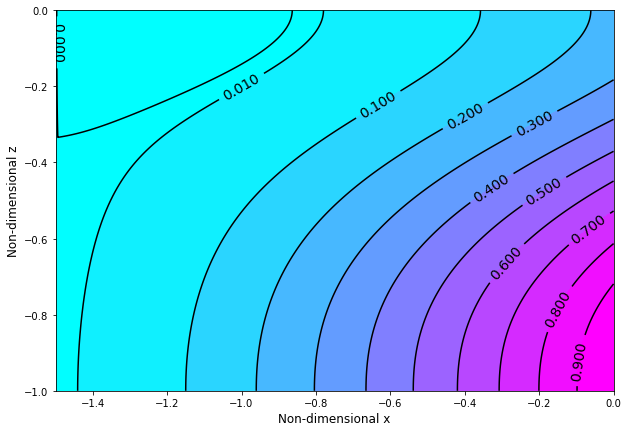

In [22]:
levels = [0,0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9]

plt.figure(figsize = (10,7))
CS = plt.contourf(nondim_x,nondim_z,S,levels, extend='both', cmap = 'cool')
CS2 = plt.contour(CS,levels, colors='k')
plt.clabel(CS2, fontsize=14)
plt.ylabel('Non-dimensional z', fontsize=12)
plt.xlabel('Non-dimensional x', fontsize=12)

Text(0.5, 0, 'Non-dimensional x')

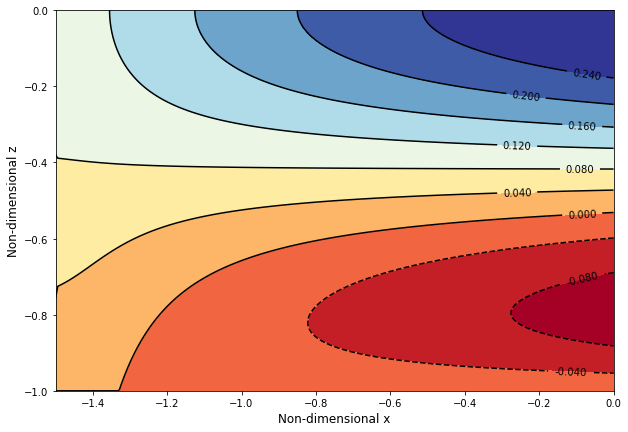

In [23]:
levels = [-0.08, -0.04, 0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24]

plt.figure(figsize = (10,7))
CS = plt.contourf(nondim_x,nondim_z,U,levels, extend='both', cmap='RdYlBu')# vmin=np.min(U), vmax=-1*np.min(U))
CS2 = plt.contour(CS,levels, colors='k')
plt.clabel(CS2, fontsize=10)
plt.ylabel('Non-dimensional z', fontsize=12)
plt.xlabel('Non-dimensional x', fontsize=12)

In [28]:
#turbulent diffusivities
Ubar = Fr*c
Ut = 1

a1 = 0.035
K_H = a1*Ut*B
print(K_H)

a0 = 0.028
C_D = 0.0026
K_M = a0*C_D*H*Ut
print(K_M)

Sc = 2.2
K_S = K_M/Sc
print(K_S)

35.0
0.0007279999999999999
0.00033090909090909086


In [33]:
#length scales
Lh = K_H/Ubar
Le1 = (0.019*Ubar*(H**2))/K_S
Le2 = (0.031*c*(H**2))/math.sqrt(K_S*K_M)
Le3 = (0.024*((c/Ubar)**(1/3))*c*(H**2))/((K_S*(K_M**2))**(1/3))

print(Lh)
print(Le1)
print(Le2)
print(Le3)

350.0
574.1758241758242
10140.690494572602
17366.884651500797


In [34]:
#non-dimensionalise
print(Lh/Le3)
print(Le1/Le3)
print(Le2/Le3)

0.020153297901345478
0.03306153266390271
0.5839095898927544
